# Clustering Netflix Data
## Erica Quintana, 2022

# Table of Contents
- The Data
- The Business Question
- The Practical Uses of Results
- Data Exploration
- Analysis
- Results
- Shortcomings of Analysis
- Unsupervised Learning Vs. Modeling

# Data 
2021 Netflix data obtained from https://www.kaggle.com/shivamb/netflix-shows/metadata

# The Research Question

How can unsupervised learning techniques be used to identify movies and tv shows that are similar to each other based on characteristics?

# The Practical Uses of Results
If able to effectively create clusters of TV shows and Movies based on shared characteristics, the model can be used to recommend content based on user preferences and history.

# Data Exploration and Preparation
The dataset initially contained 12 variables and 8807 observations

Data exploration through visualization
- Visualization of count of movies by genre type. Filled in missing data with blanks.
- Visualization of content by TV Show versus Movies.
- Visualization of content by country in Netflix data.
- Visualization of content by rating.

Dataset manipulation for analysis
- Added unique genres as variables to dataset
- Used only the first country listed for content
- Created dummy variables for:
    - Rating
    - Type of content
    - Duration
    - Release year

Ended with dataset of 336 variables and 8807 observations

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

sns.set_style("white")
sns.color_palette("viridis", as_cmap=True)

In [2]:
df = pd.read_csv(r'C:\Users\emquinta\Dropbox (ASU)\PC\Documents\Thinkful\Unsupervised learning\Unsupervised capstone\Netflix\archive\netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
years =df['release_year'].unique()
print(sorted(years))

[1925, 1942, 1943, 1944, 1945, 1946, 1947, 1954, 1955, 1956, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [5]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
director,2634,29.908028
country,831,9.435676
cast,825,9.367549
date_added,10,0.113546
rating,4,0.045418


In [6]:
pal = sns.color_palette("viridis",10)
pal.as_hex()
print(pal.as_hex())

['#482173', '#433e85', '#38588c', '#2d708e', '#25858e', '#1e9b8a', '#2ab07f', '#52c569', '#86d549', '#c2df23']


In [7]:
x=df.groupby(['type'])['type'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

# Exploring the data through visualizations

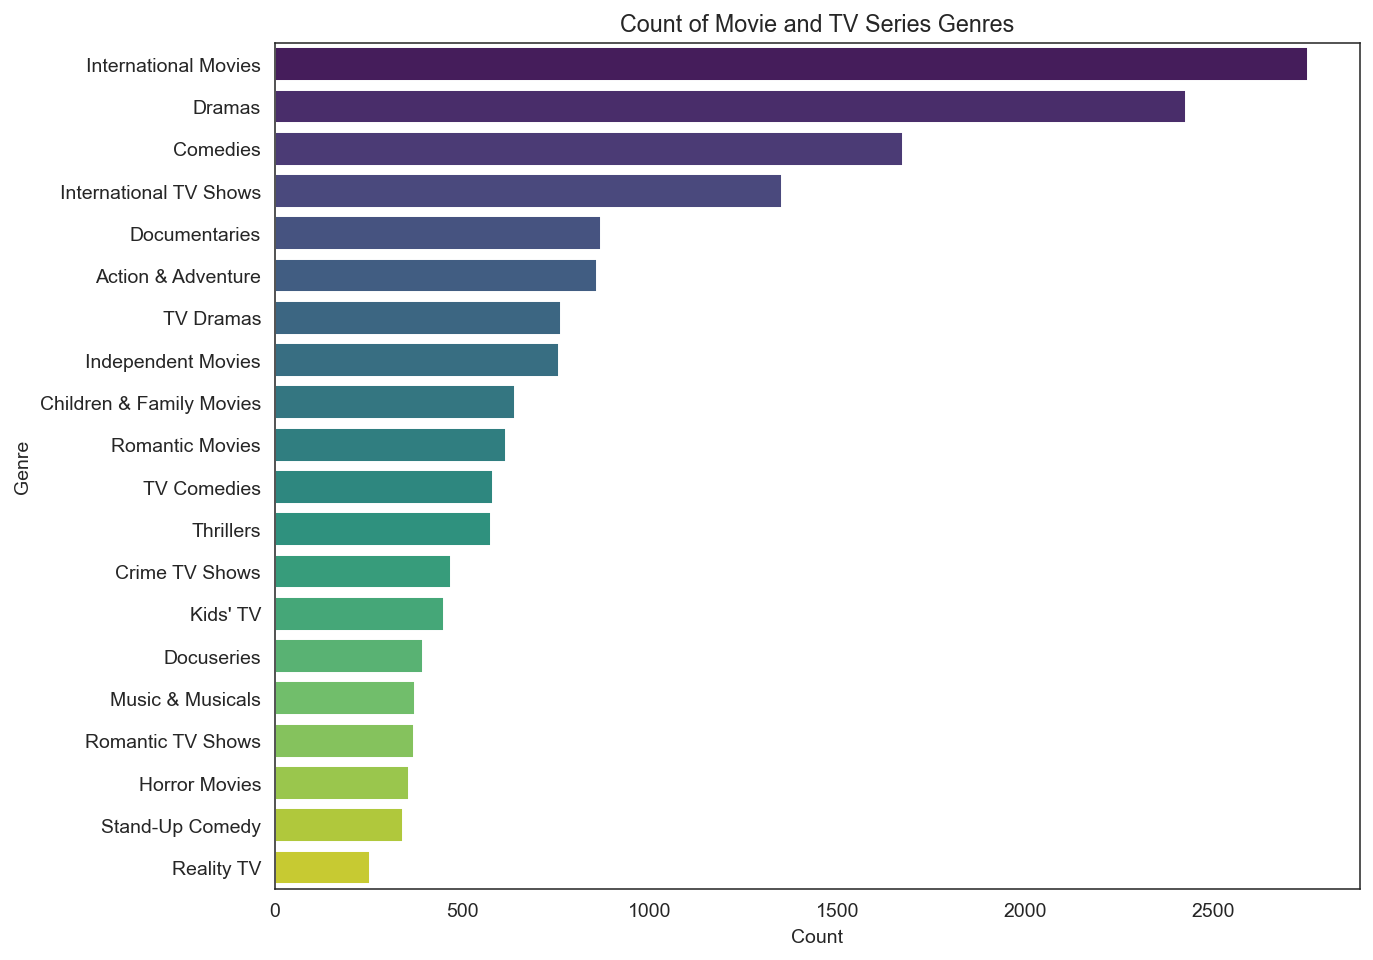

In [8]:
sns.set_style("white")
sns.color_palette("viridis", as_cmap=True)
mov_char = ", ".join(df['listed_in'].fillna("")).split(", ")
movie_characteristics = pd.DataFrame (mov_char, columns=['characteristics'])

char = movie_characteristics.groupby('characteristics')

plt.figure(figsize=(10,8))
sns.countplot(y='characteristics', data=movie_characteristics, order = movie_characteristics['characteristics'].value_counts().head(20).index, palette= "viridis")
plt.title('Count of Movie and TV Series Genres')
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

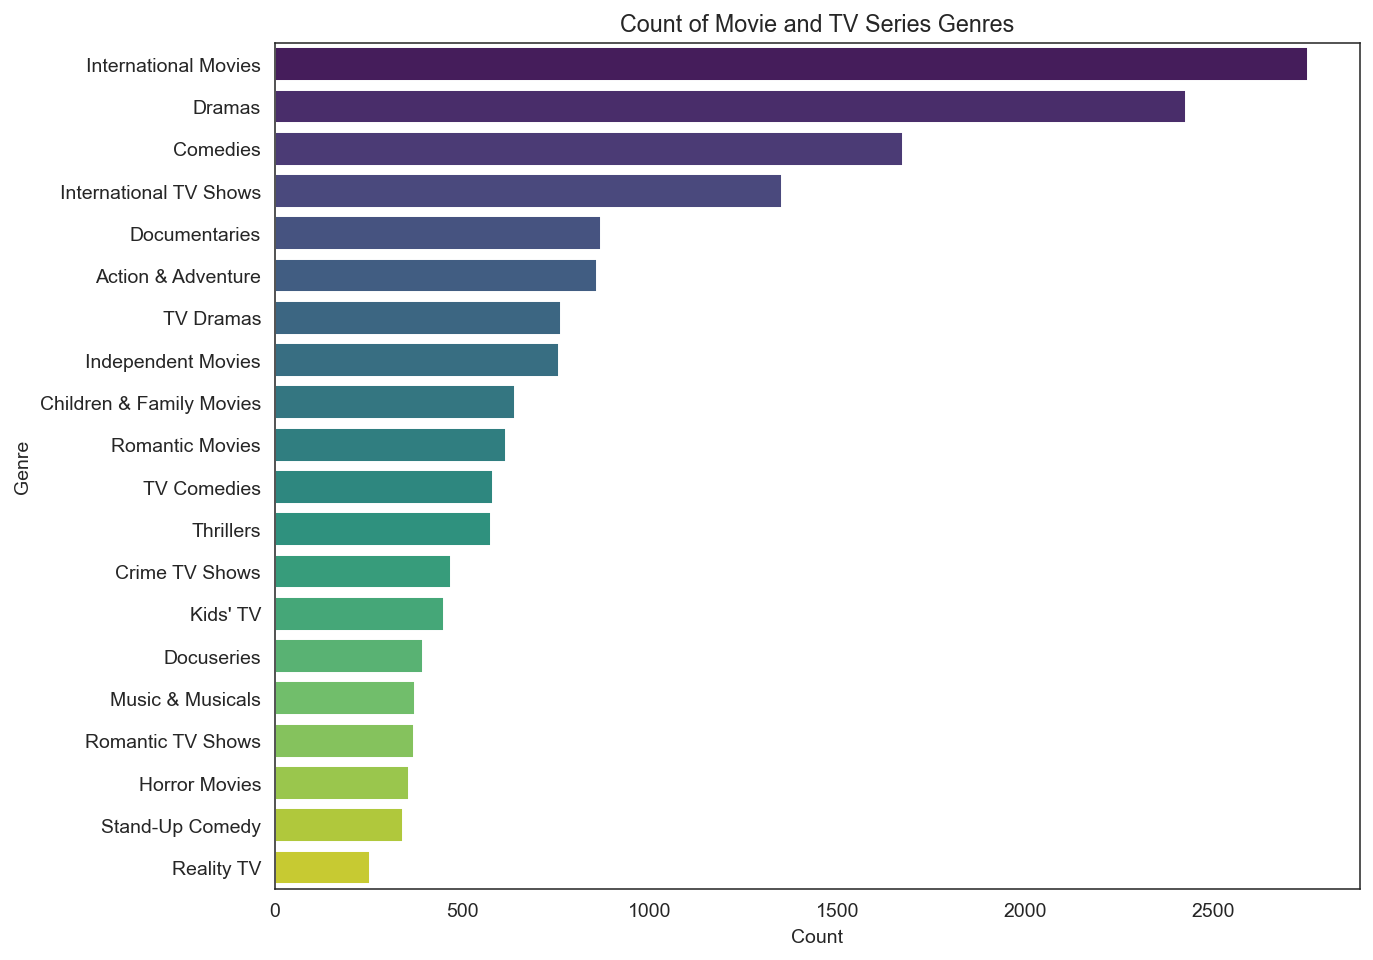

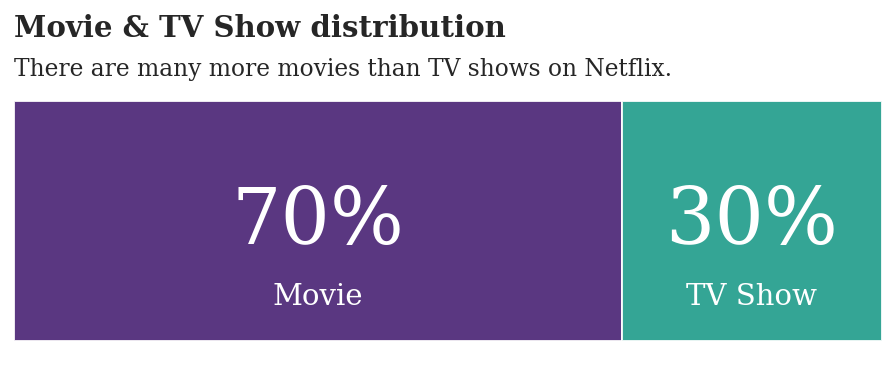

In [9]:
fig, ax = plt.subplots(1,1,figsize=(8, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#482173', alpha= 0.9)
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#1e9b8a', alpha=0.9)

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(mf_ratio.index, fontfamily='serif', fontsize=11)


# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')






# Title & Subtitle
fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'There are many more movies than TV shows on Netflix.',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
plt.show()

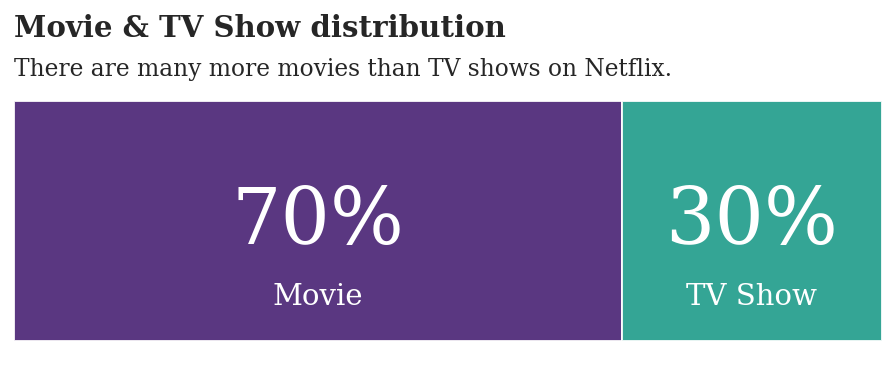

In [10]:
df['country'].fillna(value='No Country',inplace=True)
df['count'] = 1
df['first_country'] = df['country'].apply(lambda x: str(x).split(",")[0])
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count,first_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,United States
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1,South Africa


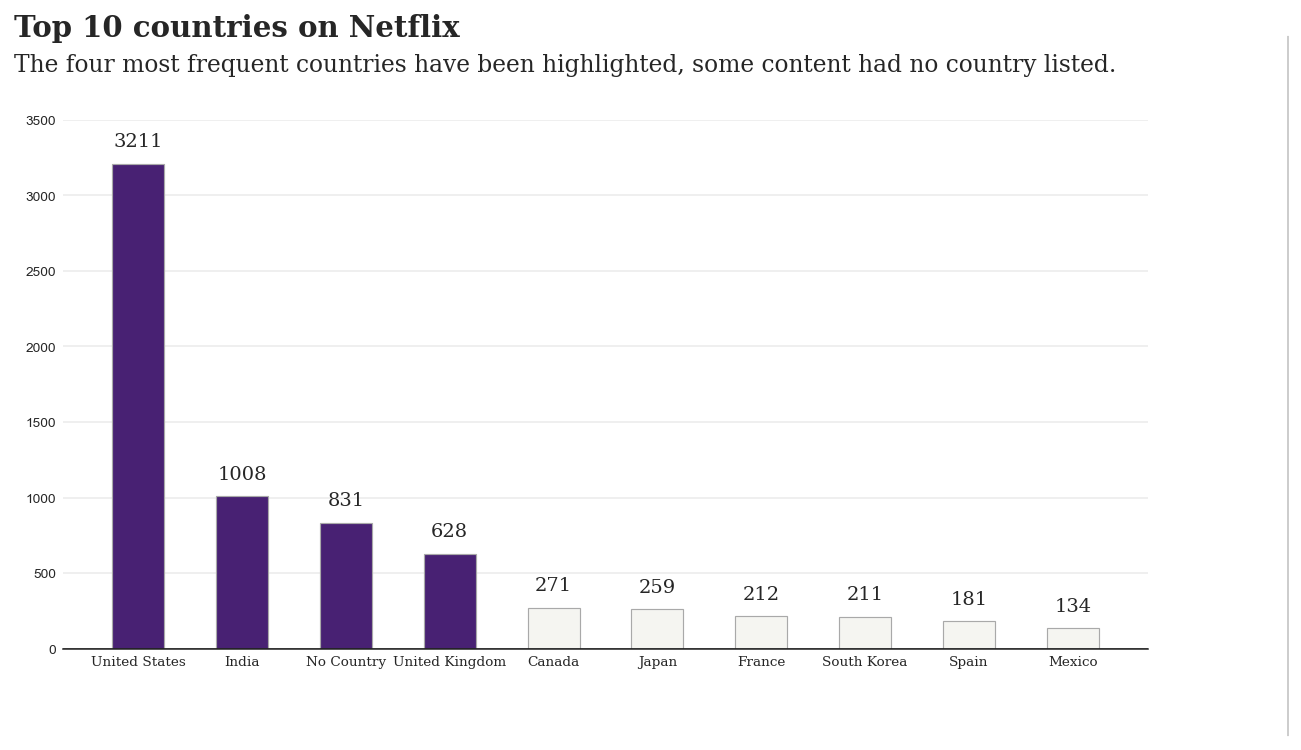

In [11]:
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

# Plot

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = color_map[3] = '#482173' # color highlight

fig, ax = plt.subplots(1,1, figsize=(10, 5))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 150), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Top 10 countries on Netflix', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The four most frequent countries have been highlighted, some content had no country listed.', fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 4000, 500) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

#plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
#plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
 #plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=7)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

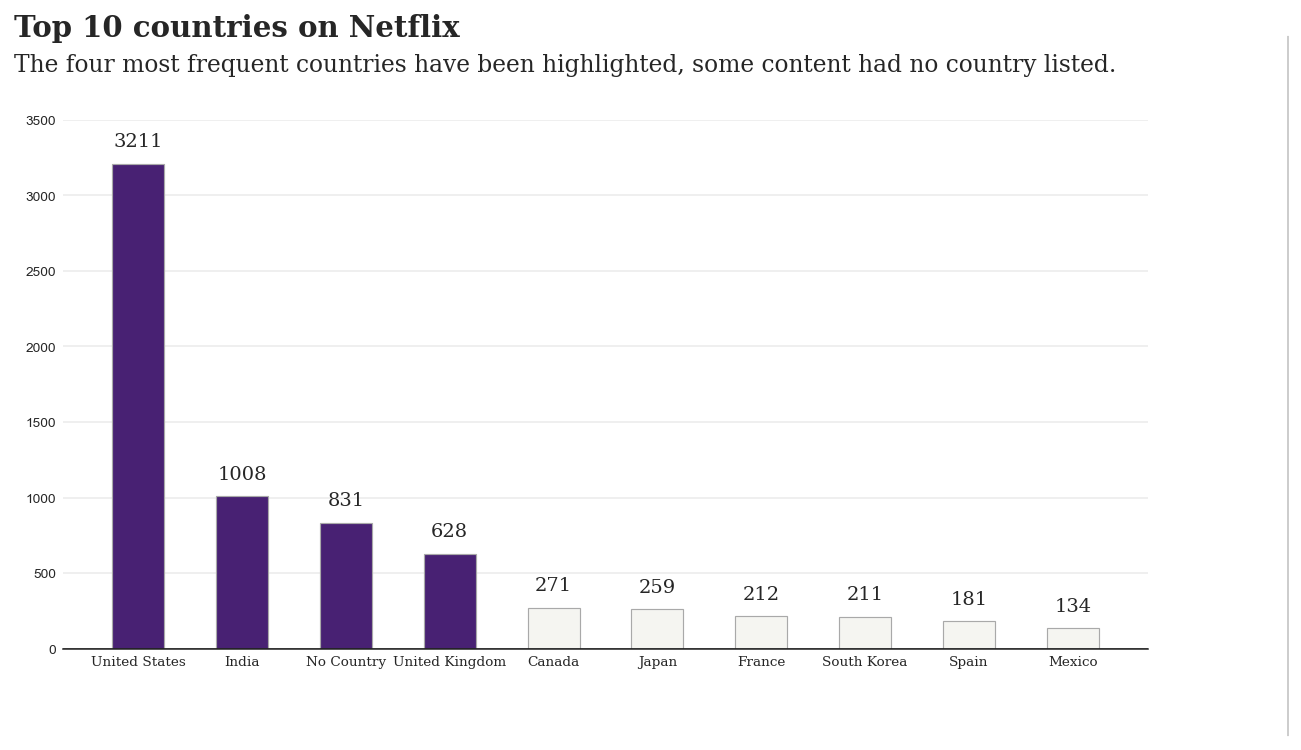

In [12]:
rating_counts=df['rating'].value_counts()
rating_counts.head(10)

TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: rating, dtype: int64

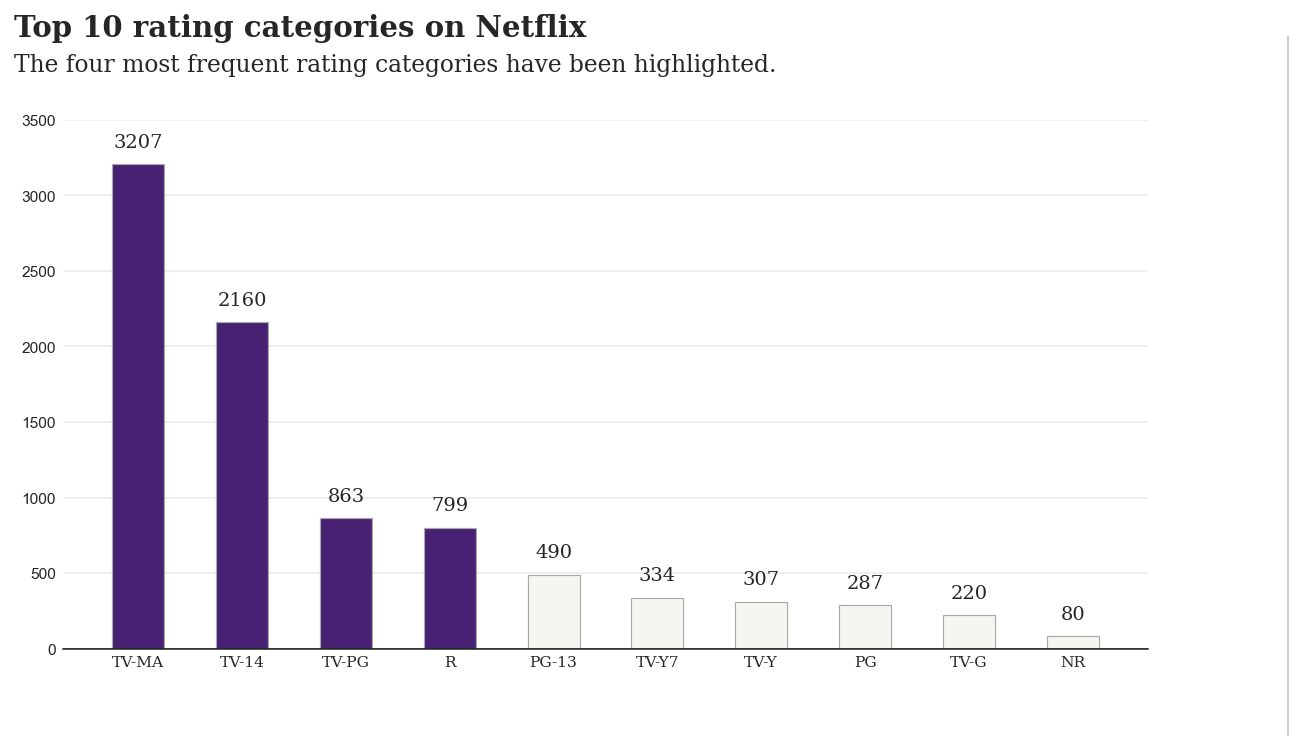

In [13]:
rating_counts=df['rating'].value_counts()
data = df.groupby('rating')['count'].sum().sort_values(ascending=False)[:10]

# Plot

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = color_map[3] = '#482173' # color highlight

fig, ax = plt.subplots(1,1, figsize=(10, 5))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 150), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Top 10 rating categories on Netflix', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The four most frequent rating categories have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 4000, 500) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

#plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
#plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
 #plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=8)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

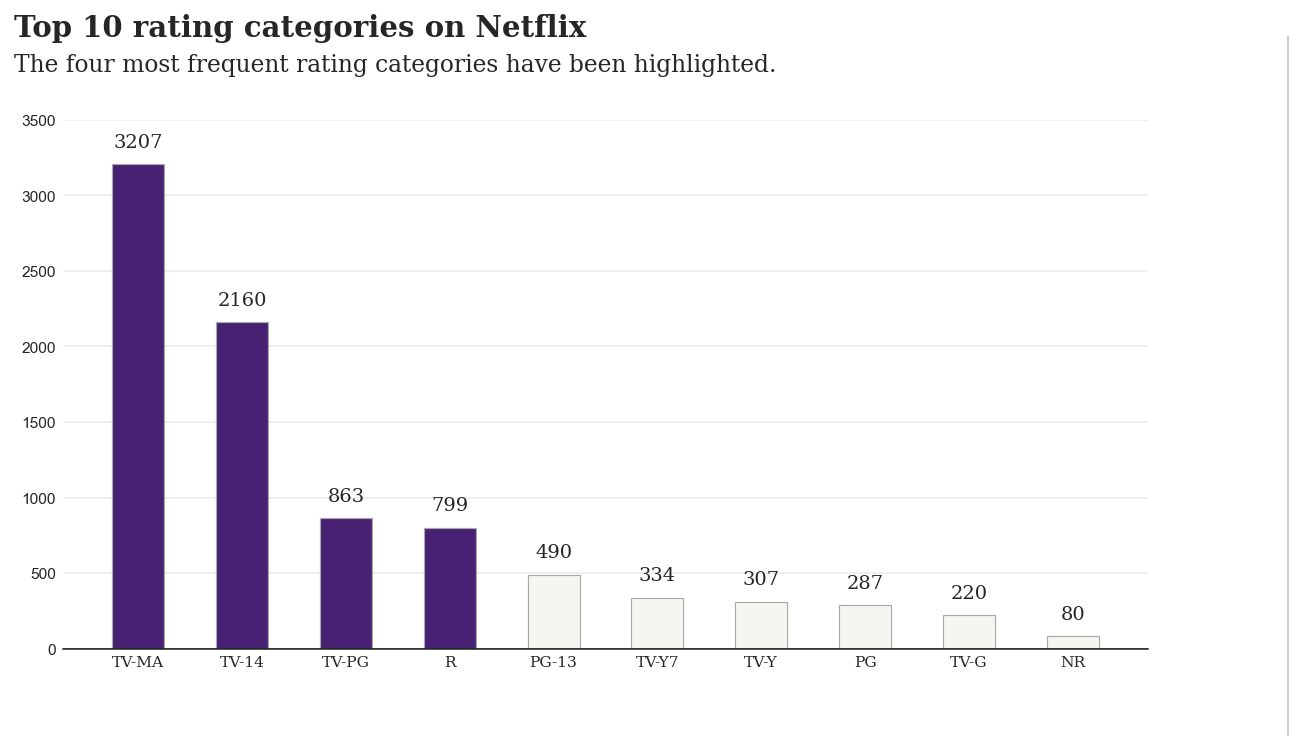

In [14]:
cols=df.columns

In [15]:
genres=df['listed_in']
genres_cleaned=[]
for i in range(len(genres)):
  for j in genres[i].split(', '):
    genres_cleaned.append(j) 

In [16]:
unique_genres=[]
for i in range(len(genres_cleaned)):
  if genres_cleaned[i] not in unique_genres and 'TV' not in genres_cleaned[i]:
    unique_genres.append(genres_cleaned[i])

In [17]:
for i in unique_genres:
  df[i]=0


for i in range(len(df)):
  for j in unique_genres:
    if j in df['listed_in'][i]:
      df[j][i]=1
    else:
      continue

In [18]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Classic Movies,Anime Features,Sports Movies,Anime Series,Cult Movies,Faith & Spirituality,LGBTQ Movies,Stand-Up Comedy,Movies,Stand-Up Comedy & Talk Shows
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,0,0,0,0,0,0,0,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Country,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,No Country,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   show_id                       8807 non-null   object
 1   type                          8807 non-null   object
 2   title                         8807 non-null   object
 3   director                      6173 non-null   object
 4   cast                          7982 non-null   object
 5   country                       8807 non-null   object
 6   date_added                    8797 non-null   object
 7   release_year                  8807 non-null   int64 
 8   rating                        8803 non-null   object
 9   duration                      8804 non-null   object
 10  listed_in                     8807 non-null   object
 11  description                   8807 non-null   object
 12  count                         8807 non-null   int64 
 13  first_country     

In [20]:
netflix = df.copy(deep=True)
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   show_id                       8807 non-null   object
 1   type                          8807 non-null   object
 2   title                         8807 non-null   object
 3   director                      6173 non-null   object
 4   cast                          7982 non-null   object
 5   country                       8807 non-null   object
 6   date_added                    8797 non-null   object
 7   release_year                  8807 non-null   int64 
 8   rating                        8803 non-null   object
 9   duration                      8804 non-null   object
 10  listed_in                     8807 non-null   object
 11  description                   8807 non-null   object
 12  count                         8807 non-null   int64 
 13  first_country     

In [21]:
# drop the cast, country, listed in, count, year_added, Month added, show ID, title, director, date added to netflix, and description features
netflix=pd.concat([netflix, pd.get_dummies(netflix['rating'], prefix='rating')], axis=1)
netflix=pd.concat([netflix, pd.get_dummies(netflix['type'])], axis=1)
netflix=pd.concat([netflix, pd.get_dummies(netflix['duration'], prefix='rating')], axis=1)
netflix=pd.concat([netflix, pd.get_dummies(netflix['release_year'])], axis=1)
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,0,0,0,0,0,0,0,0,1,0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,0,0,0,0,0,0,0,0,1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Country,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,No Country,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,0,0,0,0,0,0,0,0,1


In [22]:
netflix=netflix.drop(cols, axis=1)

In [23]:
netflix.head()

,Documentaries,Docuseries,Children & Family Movies,Dramas,Independent Movies,International Movies,Comedies,Thrillers,Romantic Movies,Music & Musicals,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Columns: 336 entries, Documentaries to 2021
dtypes: int64(23), uint8(313)
memory usage: 4.2 MB


# Exploring Dimensionality Reduction Techniques

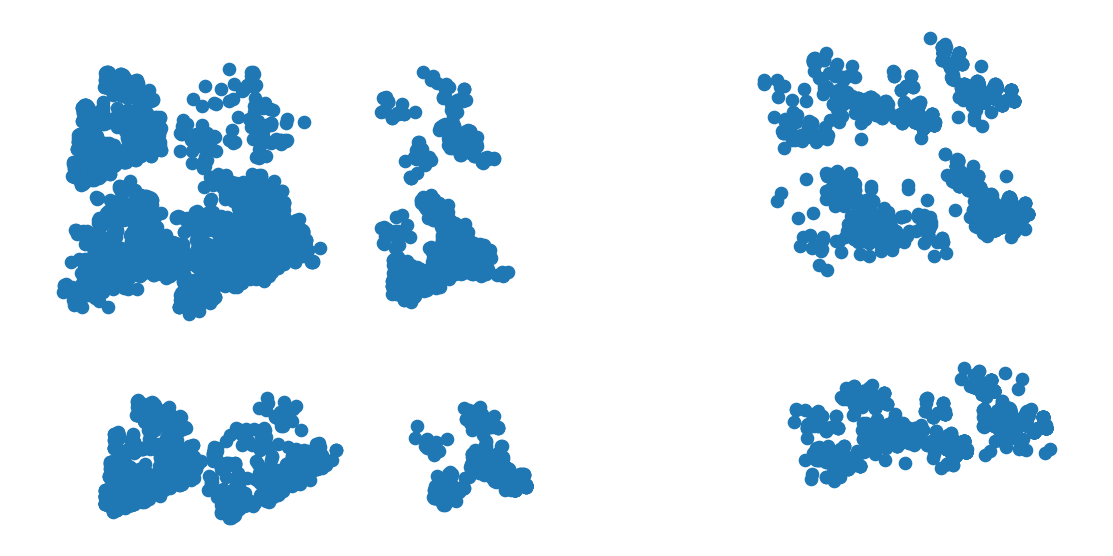

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(netflix)

plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

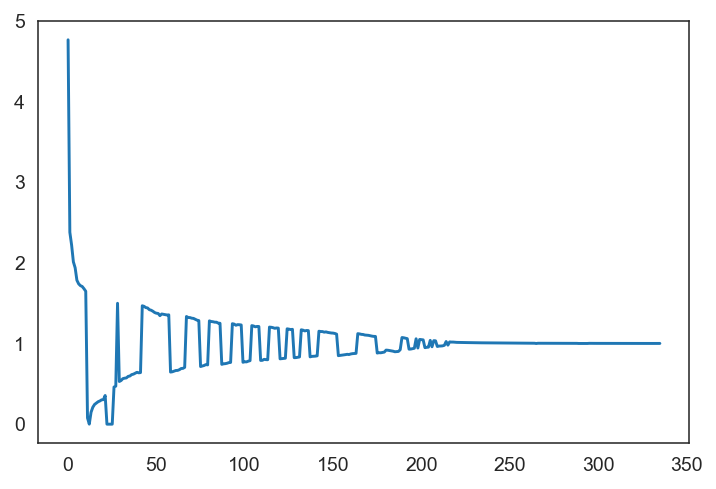

[ 4.76404637e+00  2.37845666e+00  2.21961996e+00  2.01195247e+00
  1.93854187e+00  1.78347733e+00  1.73903652e+00  1.71683057e+00
  1.70643677e+00  1.67887494e+00  1.64755304e+00  7.74953269e-02
  5.27105115e-04  1.47456641e-01  2.09809615e-01  2.44531958e-01
  2.61154608e-01  2.78093134e-01  2.87744546e-01  3.01758240e-01
  3.04001726e-01  3.55331565e-01  5.37607693e-16  7.70384438e-16
 -8.02081149e-16 -1.04576540e-15  4.60400676e-01  4.71043064e-01
  1.49829361e+00  5.28965121e-01  5.40877567e-01  5.64151841e-01
  5.69985982e-01  5.73307471e-01  5.92066085e-01  5.97113069e-01
  6.14369836e-01  6.20055308e-01  6.30909410e-01  6.42939628e-01
  6.36568234e-01  6.39196878e-01  1.46748126e+00  1.46036690e+00
  1.44509618e+00  1.44032710e+00  1.41928786e+00  1.41240445e+00
  1.39977311e+00  1.38358960e+00  1.37509994e+00  1.37247590e+00
  1.34509178e+00  1.36566362e+00  1.36175496e+00  1.35831154e+00
  1.35317695e+00  1.35473018e+00  6.45832795e-01  6.49336962e-01
  6.58000017e-01  6.65210

In [28]:
# Print scree plot
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

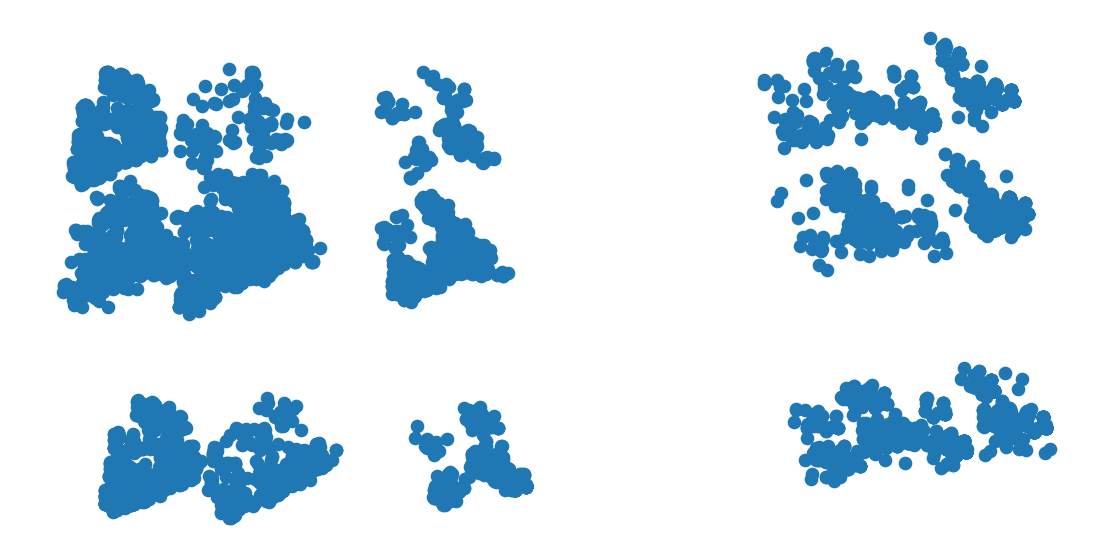

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca_components = pca.fit_transform(netflix)

plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8807 samples in 0.002s...
[t-SNE] Computed neighbors for 8807 samples in 1.650s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8807
[t-SNE] Computed conditional probabilities for sample 2000 / 8807
[t-SNE] Computed conditional probabilities for sample 3000 / 8807
[t-SNE] Computed conditional probabilities for sample 4000 / 8807
[t-SNE] Computed conditional probabilities for sample 5000 / 8807
[t-SNE] Computed conditional probabilities for sample 6000 / 8807
[t-SNE] Computed conditional probabilities for sample 7000 / 8807
[t-SNE] Computed conditional probabilities for sample 8000 / 8807
[t-SNE] Computed conditional probabilities for sample 8807 / 8807
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.789902
[t-SNE] KL divergence after 300 iterations: 2.628930


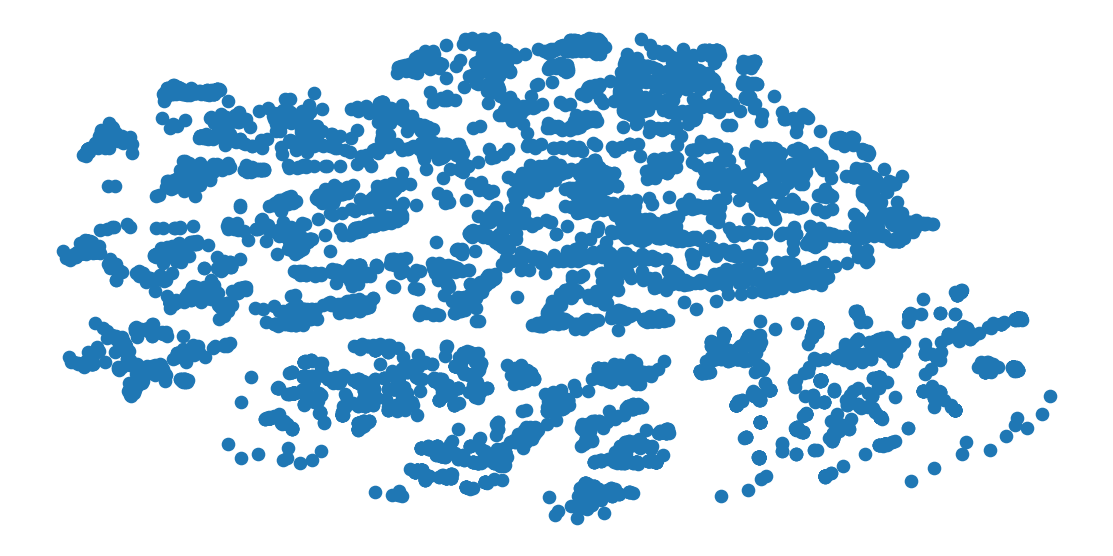

In [30]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=123)
tsne_results = tsne.fit_transform(netflix)

plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 8807 samples in 0.002s...
[t-SNE] Computed neighbors for 8807 samples in 1.790s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8807
[t-SNE] Computed conditional probabilities for sample 2000 / 8807
[t-SNE] Computed conditional probabilities for sample 3000 / 8807
[t-SNE] Computed conditional probabilities for sample 4000 / 8807
[t-SNE] Computed conditional probabilities for sample 5000 / 8807
[t-SNE] Computed conditional probabilities for sample 6000 / 8807
[t-SNE] Computed conditional probabilities for sample 7000 / 8807
[t-SNE] Computed conditional probabilities for sample 8000 / 8807
[t-SNE] Computed conditional probabilities for sample 8807 / 8807
[t-SNE] Mean sigma: 0.832314
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.887253
[t-SNE] KL divergence after 300 iterations: 1.744221


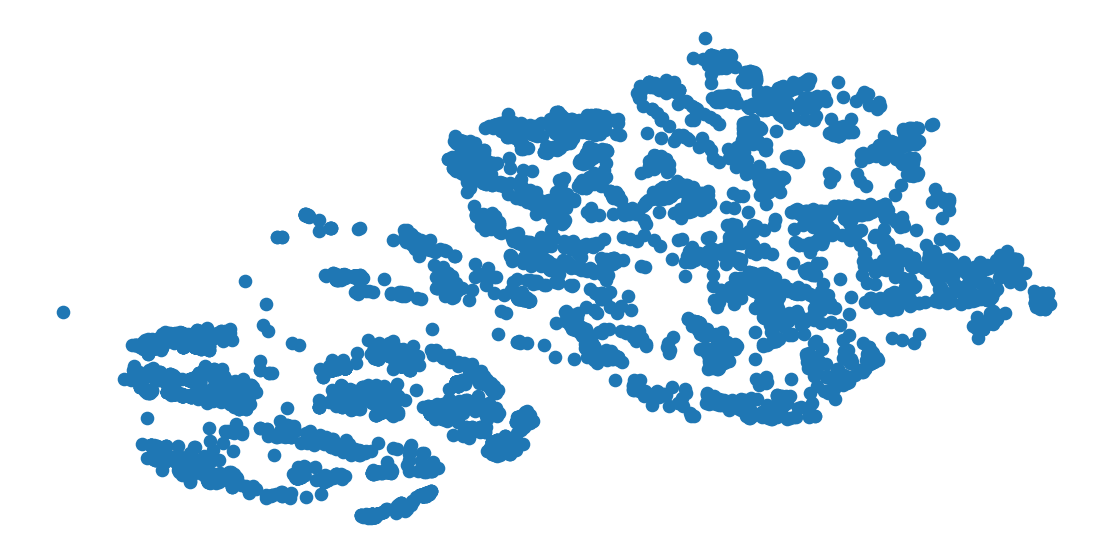

In [31]:
tsne = TSNE(n_components=2, verbose=1, perplexity=200, n_iter=300)
tsne_results = tsne.fit_transform(netflix)

plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

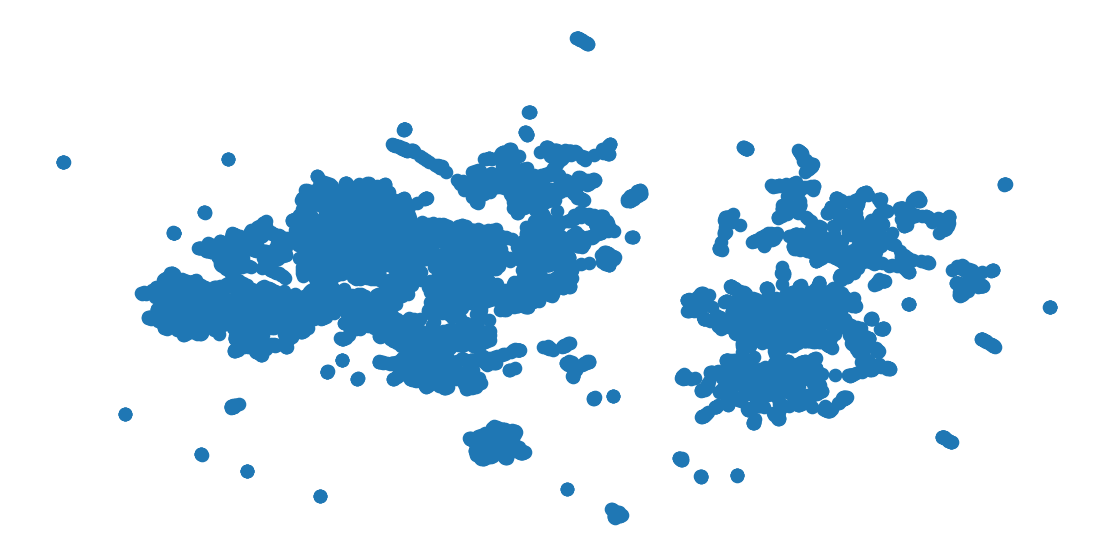

In [32]:
import umap
umap_results = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation').fit_transform(netflix)

plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

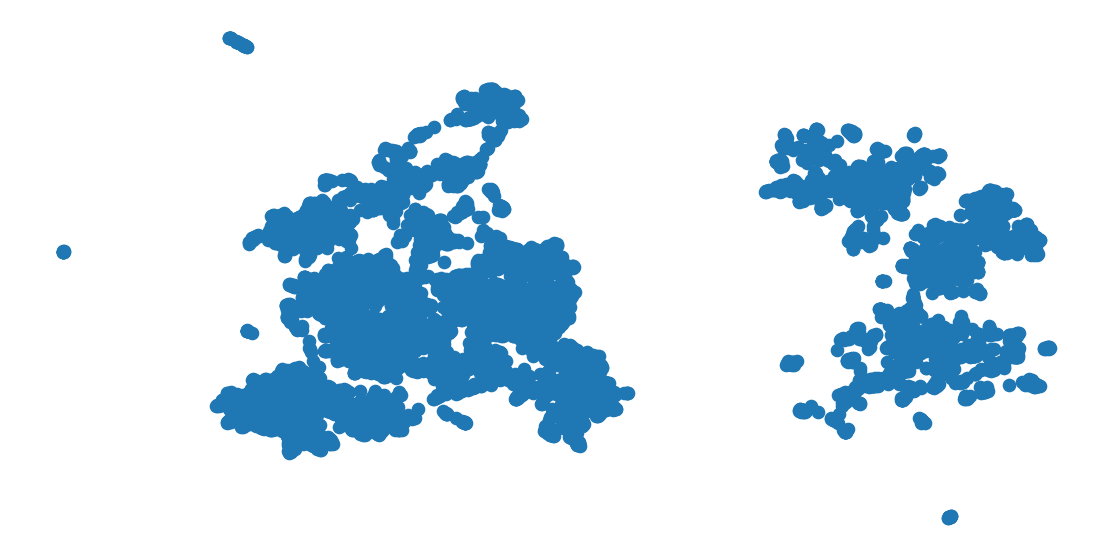

In [33]:
import umap
umap_results = umap.UMAP(n_neighbors=7, min_dist=0.3, metric='correlation').fit_transform(netflix)

plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

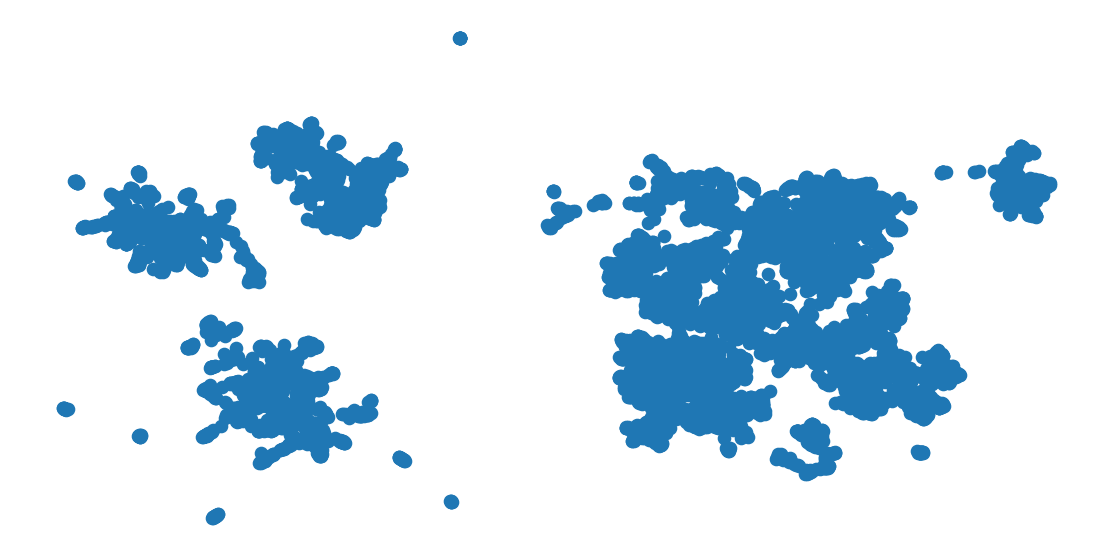

In [34]:
import umap
umap_results = umap.UMAP(n_neighbors=8, min_dist=0.3, metric='correlation').fit_transform(netflix)

plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

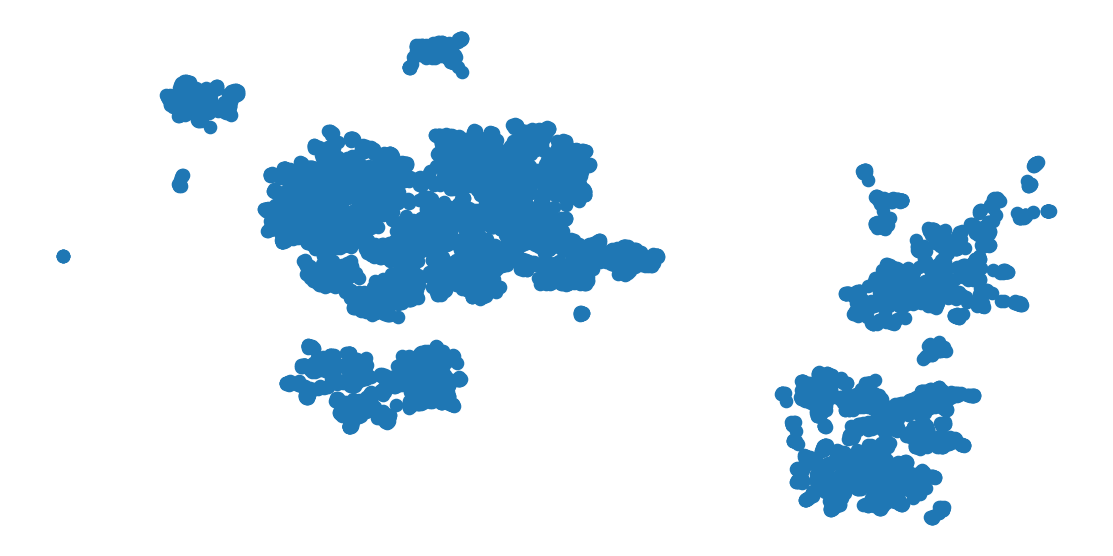

In [35]:
import umap
umap_results = umap.UMAP(n_neighbors=10, min_dist=0.3, metric='correlation').fit_transform(netflix)

plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# Dimensionality Reduction Best Fit
Since there is no known correct answer for this particular dataset, I chose to proceed with the PCA attempt 1 since it resulted in fairly clear separation.

# Clustering Models Attempted
- K-means
- Heriarchical
- Gaussian Mixture Model

In [36]:
pca = PCA(n_components=2, random_state=123)
pca_components = pca.fit_transform(netflix)

## K- means

In [37]:
from sklearn import datasets, metrics 
clusters=0
best=0
for i in range(2,15):
  labels = KMeans(n_clusters=i, random_state=123).fit_predict(pca_components)
  sil=metrics.silhouette_score(pca_components, labels, metric='euclidean')
  if sil>best:
    best=sil
    clusters=i
print('The Silhuette score with {} clusters is {}'.format(clusters, best))

The Silhuette score with 7 clusters is 0.641310384460347


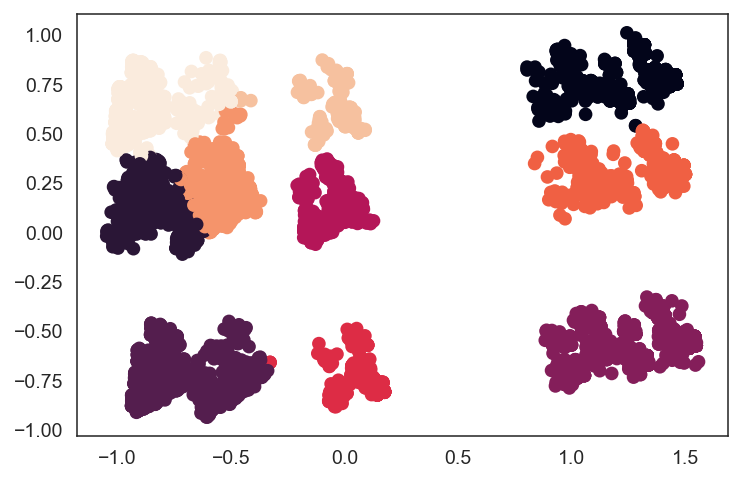

In [38]:
from sklearn import datasets, metrics 
cluster= KMeans(n_clusters=10, random_state=123)

y_pred = cluster.fit_predict(pca_components)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=y_pred)
plt.show()

## Hierarchical

In [39]:
from sklearn.cluster import AgglomerativeClustering
best=0
n_clusters=0
for i in range(2,15):
  agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=i)


  clusters = agg_cluster.fit_predict(pca_components)

  score=metrics.silhouette_score(pca_components, clusters, metric='euclidean')

  if score>best:
    best=score
    n_clusters=i
  else:
    continue

print("Silhouette score of linkage method ward and {} clusters: {}".format(n_clusters,best))

Silhouette score of linkage method ward and 7 clusters: 0.6402313271363994


## Gaussian Mixture Model

In [40]:
from sklearn.mixture import GaussianMixture
n_clusters=0
best=0
for i in range(2,15):
  gmm_cluster = GaussianMixture(n_components=i, random_state=123, covariance_type='tied')

  clusters = gmm_cluster.fit_predict(pca_components)
  sil=metrics.silhouette_score(pca_components, clusters, metric='euclidean')
  if sil>best:
    best=sil
    n_clusters=i
print('The Silhuette score with {} clusters is {}'.format(n_clusters, best))

The Silhuette score with 8 clusters is 0.6280399133035414


# Clustering Results

The most effective dimensionality reduction technique seems to be the PCA approach. Even after experimenting with the UMAP parameters, it still didn't yield clear groups.

- The best performing clustering model is Kmeans with 7 clusters. The silhouette score for this technique was 0.6413103844596718.
- The second best performing clustering model was Hierarchical with 7 clusters. The silhouette score for this technique was 0.6402313271357205.
- The poorest performing model (not by much) was the Gaussian Mixture Model with 8 clusters. The silhouette score for this technique was 0.6280399133028505.

# Recommendations
When using clustering to identify TV shows and Movies based on similar characteristics, I recommend using the PCA dimensionality reduction technique along with K-means clustering with 7 clusters.

# Shortcomings of Analysis
- There were many dummy variables created to account for different levels of variables in the dataset. It is possible that further reduction of the number of variables by using grouping techniques could potentially help the model perform better. 
- Combining multiple models over time may help to address the lack of known data or divisions of groups. 

# Clustering V. Modeling
- Clustering pro: allows for unique patterns and groupings to emerge directly from the data without much interference by the analyst. 
- Clustering con: lack of known truth of dataset (something to compare results to) means we can’t truly know how well the results reflect reality.
- Modeling pro: presence of known outcomes allows for model comparison to real-world truth and provides opportunities for model improvement.
- Modeling con: does not identify patterns directly from data and analysts may miss unique or important insights.